In [1]:
#vectorization
import numpy as np
import time

a=np.random.rand(1000000)
b=np.random.rand(1000000)

#vectorized version
tic=time.time()
c=np.dot(a,b)
toc=time.time()

print(c)
print("vectorized version:"+str(1000*(toc-tic))+"ms")

#for loop version
c=0
tic=time.time()
for i in range(1000000):
    c+=a[i]*b[i]
toc=time.time()
print(c)
print("For loop:"+str(1000*(toc-tic))+"ms")

249720.80594823652
vectorized version:2.2017955780029297ms
249720.80594823833
For loop:743.2999610900879ms


In [2]:
#broadcasting in python
#calorie from carbs, protiens and fats in 100mg rows-carb,protein,fat
#columns-apples,beef,eggs,potato
A=np.array([[56.0,0.0,4.4,68.0],
           [1.2,104.0,52.0,8.0],
           [1.8,135.0,99.0,0.9]])
#calculate percentage
#axis=0 means calculating sum along vertical,if it is 1 it will be a horizondal sum
cal=A.sum(axis=0)
percentage=100*(A/A.sum(axis=0))
#percentage
perc=100*A/(cal.reshape(1,4))
perc


array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

In [3]:
#convert an img (32*32*3) to a column vector
a=np.random.rand(32,32,3)

In [4]:
b=a.reshape(32*32*3,1)

In [5]:
b.shape

(3072, 1)

In [6]:
a=np.random.randn(3,3)
b=np.random.randn(3,1)
c=a*b

In [7]:
c

array([[-0.30652427,  0.52696044,  0.51625322],
       [ 0.3560777 ,  0.31060992,  0.18066265],
       [ 0.19555822, -0.09411856,  0.01846461]])

In [8]:
a

array([[-0.74664261,  1.28358878,  1.25750776],
       [ 0.70987383,  0.6192296 ,  0.36016769],
       [-0.29466255,  0.14181565, -0.02782204]])

In [9]:
b

array([[ 0.4105368 ],
       [ 0.50160703],
       [-0.66366839]])

In [10]:
a@b

array([[-0.49723526],
       [ 0.36300734],
       [-0.03136949]])

In [11]:
#basic sigmoid
def sigmoid(x):
    """
    input-x  is an integer
    output-s sigmoid function"""
    s=1/(1+np.exp(-x))
    return s
sigmoid(3)

0.9525741268224334

In [12]:
x=np.array([1,2,3])

In [13]:
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

In [14]:
def sigmoid_derivative(x):
    #use the sigmoid funcion , pervisously written
    s=sigmoid(x)
    s_grad=s*(1-s)
    return s_grad
sigmoid_derivative(x)
    

array([0.19661193, 0.10499359, 0.04517666])

In [15]:
print("Sigmoid derivative(x):"+str(sigmoid_derivative(x)))

Sigmoid derivative(x):[0.19661193 0.10499359 0.04517666]


In [16]:
import cv2
#GRADED FUNCTION_image2vector
def image2vector(image):
    image=image.reshape((image.shape[0]*image.shape[1]*image.shape[2],1))
    return image

In [17]:
img=cv2.imread('burano.png')

In [18]:
img_2=image2vector(img)

In [19]:
img_2

array([[255],
       [255],
       [255],
       ...,
       [255],
       [255],
       [255]], dtype=uint8)

In [20]:
img_2.shape

(551586, 1)

In [21]:
img.shape

(322, 571, 3)

In [22]:
x=np.array([[0,3,4],
          [1,6,4]])

def normalizeRows(x):
    """ implement a function that normalizes each row of the matrix x(to have unit length)
    argument:
    X--A numpy matrix of shape(n,m)
    Returns:
    X-- The normalized(by row) matrix """
    #calculating the normal
    x_norm=np.linalg.norm(x, axis=1,keepdims=True)
    #dividing x by its normal
    x=x/x_norm
    return x

normalizeRows(x)
    
    

array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

In [23]:
def softmax(x):
    """ 
    calculates the softmax for each row of the input x. 
    Your code should work for a row vector and also for matrices of shape(n,m)
    
    Returns:
    S--A numpy matrix equal to softmax of x, of shape(n,m)
    
    """
    #apply exp() elementvise to x use np.exp()
    x_exp=np.exp(x)
    #create a vector x sum that sums each row of x.exp .Use np.sum(...,axis=1,keepdims=True)
    x_sum=np.sum(x_exp,axis=1,keepdims=True)
    
    #compute softmax x by using broadcasting
    s=x_exp/x_sum
    return s

x=np.array([[9,2,5,0,0],
           [7,5,0,0,0]])

print("softmax(x):"+str(softmax(x)))
    

softmax(x):[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [24]:
#Vectorization
#Classic dot product of vector implementation
x1=[9,2,5,0,0,7,5,0,0,0,9,2,5,0,0]
x2=[9,2,2,9,0,9,2,5,0,0,9,2,5,0,0]

tic=time.process_time()
dot=0
for i in range(len(x1)):
    dot+=x1[i]*x2[i]
toc=time.process_time()
print("dot product:"+str(dot)+"\ntime_taken:"+str(toc-tic))

#classic outer product
tic=time.process_time()
outer=np.zeros((len(x1),len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j]=x1[i]*x2[j]
toc=time.process_time()

print("outer-product:"+str(outer)+"\ntime_taken:"+str(1000*(toc-tic))+"ms")


dot product:278
time_taken:0.0002100710000001449
outer-product:[[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [25]:
#Classic element vise implementation
tic=time.process_time()
mul=np.zeros((len(x1)))
for i in range(len(x1)):
    mul[i]=x1[i]*x2[i]
    
toc=time.process_time()
print("elementvise multiplication="+str(mul)+"\n---computation time="+str(1000*(toc-tic))+"ms")

elementvise multiplication=[81.  4. 10.  0.  0. 63. 10.  0.  0.  0. 81.  4. 25.  0.  0.]
---computation time=0.26996900000009205ms


In [26]:
#classic general dot product implementation
w=np.random.rand(3,len(x1))

tic=time.process_time()
gdot=np.zeros(w.shape[0])
for i in range(w.shape[0]):
    for j in range(len(x1)):
        gdot[i]+=w[i,j]*x1[j]
toc=time.process_time()
print("gdot="+str(gdot)+"\n--computation time--"+str(1000*(toc-tic))+"ms")

gdot=[14.65109215 26.89131069 26.14180699]
--computation time--0.5816329999999148ms


In [30]:
#vectorized dot product
tic=time.process_time()
dot=np.dot(x1,x2)
toc=time.process_time()
print("dot :"+str(dot),"--computation time---",1000*(toc-tic),"ms")

dot :278 --computation time--- 0.3030650000002133 ms


In [32]:
#Vectorized outer product
tic=time.process_time()
outer=np.outer(x1,x2)
toc=time.process_time()
print("outer=",outer,"\nprocess time",1000*(toc-tic),"ms")

outer= [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]] 
process time 0.36185600000004925 ms


In [35]:
#vectorized element vise multiplication
tic=time.process_time()
mul=np.multiply(x1,x2)
toc=time.process_time()
print("element vise multiplication",mul,"\n--computation time--",1000*(toc-tic),"ms")

element vise multiplication [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0] 
--computation time-- 0.2909669999997533 ms


In [37]:
#vectorized general dot product
#tic=time.process_time()
#calculating the dot product
#dot=np.dot(W,x1)
#toc=time.process_time()
#print("gdot=",dot,"\n ----computation time----",1000*(toc-tic))

In [40]:
#Graded function L1: loss function ,note: bigger the loss is , more different your prediction from True value
def L1(yhat,y):
    """"arguments:
    yhat---vector of size m(predicted label)
    y------vector of size m(true)
    
    Returns:
    loss---the value of the L1 loss function defined above"""
    loss=np.sum(np.abs(yhat-y))
    return loss


In [42]:
yhat=np.array([0.9,0.2,0.1,0.4,0.9])
y=np.array([1,0,0,1,1])
print("Loss(L1)=",L1(yhat,y))

Loss(L1)= 1.1


In [45]:
def L2(yhat,y):
    """arguments:
    yhat----vector of size m(predicted label)
    y-------vector of size m(True)
    
    Return:
    loss--the value of the L2 loss"""
    loss=np.sum((y-yhat)**2)
    return loss

print("L2:",L2(yhat,y))

L2: 0.43


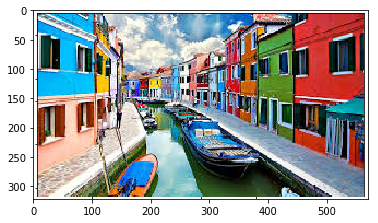

In [51]:
import PIL
import matplotlib.pyplot as plt
def image2vector(s):
    img=cv2.imread(s)#read image
    return img
image_vector=image2vector('burano.png')
plt.imshow(image_vector)

In [52]:
import h5py